### **Download Dataset from the shared Google drive**

In [ ]:
# install the gdown package which can download files from Google Drive.
!pip install -U gdown
import gdown

# Download entire folder (requires folder ID and setting use_cookies=True)
folder_id = "1gUQo0RGSZGxdSYnzOi3QvbMkE0ABpOma"
gdown.download_folder(f"https://drive.google.com/drive/folders/{folder_id}", use_cookies=True)

Retrieving folder contents


Retrieving folder 1jUpGikZaKXeVFJ5VmLAVRsk83LTCnIup Data
Retrieving folder 14ITe68X0CG4--RvcF5JL01USALy4uB0d GANSim_2DPointbar_Data_Model
Retrieving folder 1ZwysK4cUpDZTvST4ZWTHr2hFDudBVmCy PreparedDataset
Retrieving folder 1rwOIZ-0hhtCZQ2kEMaCrVG5WY3Hrj1dr TestData
Processing file 11vSlHN9LvNvmQTGAQlQrSlaj9tQhmPRi TestData-1r02.tfrecords
Processing file 1OUVVMBJ_usPVAtVIILf_CIBkRbcyDjYZ TestData-1r03.tfrecords
Processing file 1YF7oc3f2iR2TWH2_RZWNiHEtiQI-5E9D TestData-1r04.tfrecords
Processing file 1xZ1BwlvZtLanloda8oyyNRKqkNCBRA0E TestData-1r05.tfrecords
Processing file 1U3jiJTdt_IlZ8_1bD4i1NB1dSBEdiJp5 TestData-1r06.tfrecords
Processing file 1oSv8ru6Sa82ffqhu8Ie5PRsAo5kBsSzC TestData-2probimages.tfrecords
Processing file 1qgS4VVlZN9DqFvDEgEpkUXpGtxajVJSg TestData-3wellfacies.tfrecords
Processing file 1IUwGbABtpNdYNcMDilKv-y7Gu9rEQGCb TestData-4rxx.labels
Retrieving folder 12wOdYzDCMBvwvkxRIHCAFFn2BLrLgCrK SNESIM
Processing file 1KZbs9q2uo6koj0N734l9JuvRYDDyW9un pointbar_cond_faciesm

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=11vSlHN9LvNvmQTGAQlQrSlaj9tQhmPRi
To: /content/GenAIGeomodeling/Data/GANSim_2DPointbar_Data_Model/PreparedDataset/TestData/TestData-1r02.tfrecords
100%|██████████| 118k/118k [00:00<00:00, 4.15MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OUVVMBJ_usPVAtVIILf_CIBkRbcyDjYZ
To: /content/GenAIGeomodeling/Data/GANSim_2DPointbar_Data_Model/PreparedDataset/TestData/TestData-1r03.tfrecords
100%|██████████| 203k/203k [00:00<00:00, 3.94MB/s]
Downloading...
From: https://drive.google.com/uc?id=1YF7oc3f2iR2TWH2_RZWNiHEtiQI-5E9D
To: /content/GenAIGeomodeling/Data/GANSim_2DPointbar_Data_Model/PreparedDataset/TestData/TestData-1r04.tfrecords
100%|██████████| 555k/555k [00:00<00:00, 6.53MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xZ1BwlvZtLanloda8oyyNRKqkNCBRA0E
To: /content/GenAIGeomodeling/Data/GANSim_2DPointbar_Data_M

['/content/GenAIGeomodeling/Data/GANSim_2DPointbar_Data_Model/PreparedDataset/TestData/TestData-1r02.tfrecords',
 '/content/GenAIGeomodeling/Data/GANSim_2DPointbar_Data_Model/PreparedDataset/TestData/TestData-1r03.tfrecords',
 '/content/GenAIGeomodeling/Data/GANSim_2DPointbar_Data_Model/PreparedDataset/TestData/TestData-1r04.tfrecords',
 '/content/GenAIGeomodeling/Data/GANSim_2DPointbar_Data_Model/PreparedDataset/TestData/TestData-1r05.tfrecords',
 '/content/GenAIGeomodeling/Data/GANSim_2DPointbar_Data_Model/PreparedDataset/TestData/TestData-1r06.tfrecords',
 '/content/GenAIGeomodeling/Data/GANSim_2DPointbar_Data_Model/PreparedDataset/TestData/TestData-2probimages.tfrecords',
 '/content/GenAIGeomodeling/Data/GANSim_2DPointbar_Data_Model/PreparedDataset/TestData/TestData-3wellfacies.tfrecords',
 '/content/GenAIGeomodeling/Data/GANSim_2DPointbar_Data_Model/PreparedDataset/TestData/TestData-4rxx.labels',
 '/content/GenAIGeomodeling/Data/GANSim_2DPointbar_Data_Model/SNESIM/pointbar_cond_fa

### **Import related libraries and set code path**

In [ ]:
import sys
import pickle
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  # if not use with this line, "AttributeError: 'int' object has no attribute 'value'"
tf.disable_eager_execution()
import PIL.Image
%matplotlib inline
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


##### Set the path to directory containing code of this case

In [ ]:
new_path = r'/content/GenAIGeomodeling/Notebooks/GANSim_2DPointbar_Codes/GANSimModel/'
sys.path.append(new_path)

### **1. Load test dataset**

Test dataset includes test facies maps of 64x64 with 4 facies types (muddy flood plain facies, mud drape facies, sandy lateral accretion facies, and channel fill facies) and the corresponding conditioning data. Conditioning data includes two global features (flood plain proportion and channel fill-to-point bar ratio where point bar includes the mud drape and lateral accretion facies), well facies data, and probability maps for mud drape, lateral accretion, and channel fill facies.

#### Set the path to data directory; this directory includes two datasets: "trainingdata" and "testdata"

In [ ]:
data_dir_test = '/content/GenAIGeomodeling/Data/GANSim_2DPointbar_Data_Model/PreparedDataset/'

In [ ]:
# --- Import test dataset ---

tf.InteractiveSession() # Initialize TensorFlow session.
import dataset

test_set = dataset.load_dataset(data_dir=data_dir_test, verbose=True, tfrecord_dir='TestData',
                                 cond_label = True, cond_well = True, cond_prob = True,
                                 well_enlarge = False, shuffle_mb = 0, prefetch_mb = 0)

data_dict = test_set.get_minibatch_np(minibatch_size = 3000, lod = 0)
facies_test = data_dict['real']          # Test facies maps
features_test = data_dict['label']       # Global features, normalized from -1 to 1
probimgs_test = data_dict['prob']        # Probability maps for mud drape, lateral accretion, and channel fill facies
wellfaciesimgs_test = data_dict['well']  # Well facies data

# Preprocess facies_test, since facies_test has the facies codes of 0, 1, 3, 4. Revise the codes into 0, 1, 2, 3 for better consistency with MPS results.
facies_test_newcode = np.where(facies_test>2, facies_test-1, facies_test)
# Preprocess well facies data, originally has the codes of 0 1, 2, 4, 5, where 0 is for non-well regions and ther other for facies types.
wellfaciesimgs_test_newcode = np.where(wellfaciesimgs_test>3, wellfaciesimgs_test-1, wellfaciesimgs_test)

/content/GenAIGeomodeling/Notebooks/GANSim_2DPointbar_Codes/GANSimModel/tfutil.py:173: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if v.shape.ndims is 0:
/content/GenAIGeomodeling/Notebooks/GANSim_2DPointbar_Codes/GANSimModel/tfutil.py:175: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif v.shape.ndims is 1:
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Streaming data using dataset.TFRecordDataset...


Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_types(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(iterator)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_classes(iterator)`.


Dataset shape = [1, 64, 64]
Dynamic range = [0, 2]
Label size    = 0


The original global features in the test dataset have been normalized to a range of [-1, 1]. They are converted into their original ranges.

In [ ]:
# Point bar to channel fill global feature
pb_cf_ratio = features_test[:, 0] # pb_cf_ratio has been normalized
pb_cf_ratio = (pb_cf_ratio / 2 + 0.5) * (2 - 0.2) + 0.2
# Flood plain proportion global feature
fp_prop = features_test[:, 1] # fp_prop has been normalized
fp_prop = (fp_prop / 2 + 0.5) * (0.82 - 0.5) + 0.5

print(f"The shape of point bar porportion feature is: {fp_prop.shape}")
print(f"The shape of point bar-to-channel fill feature is: {pb_cf_ratio.shape}")

The shape of point bar porportion feature is: (3000,)
The shape of point bar-to-channel fill feature is: (3000,)


The original well facies data in the test dataset have the shape of (3000, 1, 64, 64), where non-well regions are assigned with the value of 0, while well locations have the code larger than 1. For these well locations, mud facies is 1, channel levee facies is 2, and channel center is 3.

We process them to form two maps for each well facies data, with one as a well location indicator map, while the other as the well facies map. In well facies map, non-well regions are 0, flood plain facies is also 0, mud drape facies is 1, channel fill is 3, and lateral accretion is 4. Such processed data will be used to feed into the trained generator.

In [ ]:
wellfaciesimgs_test_loc = np.where(wellfaciesimgs_test >0, 1, 0)   # Well location indicator map
wellfaciesimgs_test_fc = (wellfaciesimgs_test - 1) * wellfaciesimgs_test_loc  # Well facies map
# Concatenation of well lcoations and well facies. Will feed into the trained generator
wellfaciesimgs_test_G = np.concatenate([wellfaciesimgs_test_loc, wellfaciesimgs_test_fc], axis = 1)

print(wellfaciesimgs_test.shape)
print(wellfaciesimgs_test_G.shape)

(3000, 1, 64, 64)
(3000, 2, 64, 64)


Sample 29 Global Features:
  Point bar-to-channel fill ratio: 1.231
  Flood plain proportion: 0.77
--------------------------------------------------
Sample 30 Global Features:
  Point bar-to-channel fill ratio: 1.013
  Flood plain proportion: 0.81
--------------------------------------------------


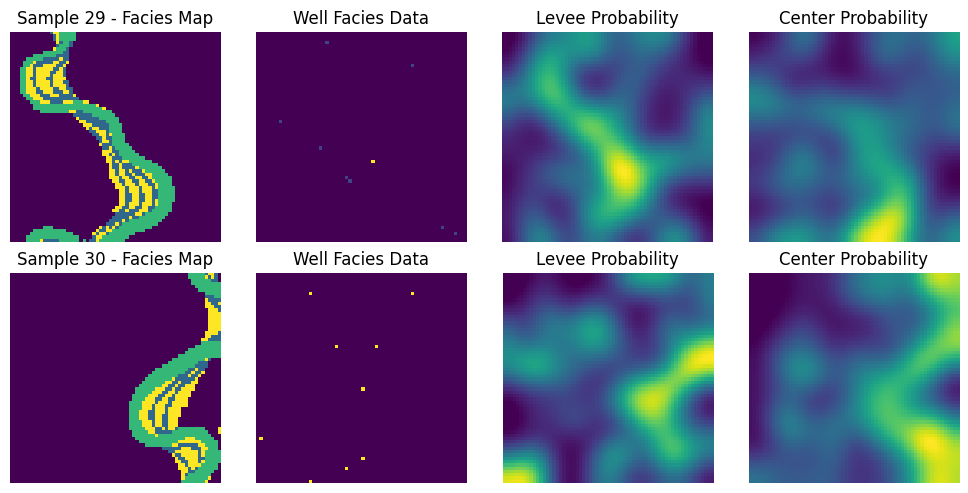

In [ ]:
# Plotting two samples starting from index 29
num_samples = 2
start_index = 29
fig, axs = plt.subplots(num_samples, 4, figsize=(10, 5))

for row_idx, i in enumerate(range(start_index, start_index + num_samples)):
    # Subplot 1: Facies map
    axs[row_idx, 0].imshow(facies_test_newcode[i, 0].astype(np.float32))
    axs[row_idx, 0].set_title(f"Sample {i} - Facies Map", fontsize=12)
    axs[row_idx, 0].axis('off')

    # Subplot 2: Well facies
    axs[row_idx, 1].imshow(wellfaciesimgs_test[i, 0].astype(np.float32))
    axs[row_idx, 1].set_title("Well Facies Data", fontsize=12)
    axs[row_idx, 1].axis('off')

    # Subplot 3: Channel Levee Probability
    axs[row_idx, 2].imshow(probimgs_test[i, 0].astype(np.float32), cmap='viridis')
    axs[row_idx, 2].set_title("Levee Probability", fontsize=12)
    axs[row_idx, 2].axis('off')

    # Subplot 4: Channel Center Probability
    axs[row_idx, 3].imshow(probimgs_test[i, 1].astype(np.float32), cmap='viridis')
    axs[row_idx, 3].set_title("Center Probability", fontsize=12)
    axs[row_idx, 3].axis('off')

    # Global features
    print(f"Sample {i} Global Features:")
    print(f"  Point bar-to-channel fill ratio: {pb_cf_ratio[i]:.3f}")
    print(f"  Flood plain proportion: {fp_prop[i]:.2f}")
    print("-" * 50)

plt.tight_layout()
plt.show()


### **2. Import pre-trained Network**

In [ ]:
# Path of trained GANSim model

GANSim_dir = '/content/GenAIGeomodeling/Data/GANSim_2DPointbar_Data_Model/TrainedModels/'
GANSim_name = 'network-snapshot-026560.pkl'

In [ ]:
# --- Load the pre-trained GANSim model ---

tf.InteractiveSession()

with tf.device('/gpu:0'):
    # Import networks.
    with open(GANSim_dir + GANSim_name, 'rb') as file:
        G, D, Gs = pickle.load(file) # Gs is the trained generator and will be evaluated!


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


In [ ]:
print(Gs.input_shapes)
print(Gs.output_shapes)

[[Dimension(None), Dimension(8), Dimension(4), Dimension(4)], [Dimension(None), Dimension(2), Dimension(64), Dimension(64)], [Dimension(None), Dimension(2), Dimension(64), Dimension(64)], [Dimension(None), Dimension(3), Dimension(64), Dimension(64)]]
[[Dimension(None), Dimension(4), Dimension(64), Dimension(64)]]


The input to the generator includes:

- 8 random latent maps, each of shape (4x4),

- 2 global feature maps, mud proportion and point bar-to-channel fill ratio,

- well facies data, consisting of a concatenation of a well location indicator map and a well facies map, and

- 2 probability maps representing the likelihood of channel levee and channel center facies.

The output of the generator includes facies indicator maps for mud facies, channel levee facies and channel center facies.

### **3. Evaluation of generated facies models**

#### 3.1 Randomly select one test data

Sample 82 Global Features:
  Point bar-to-channel fill ratio: 1.013
  Flood plain proportion: 0.81
--------------------------------------------------


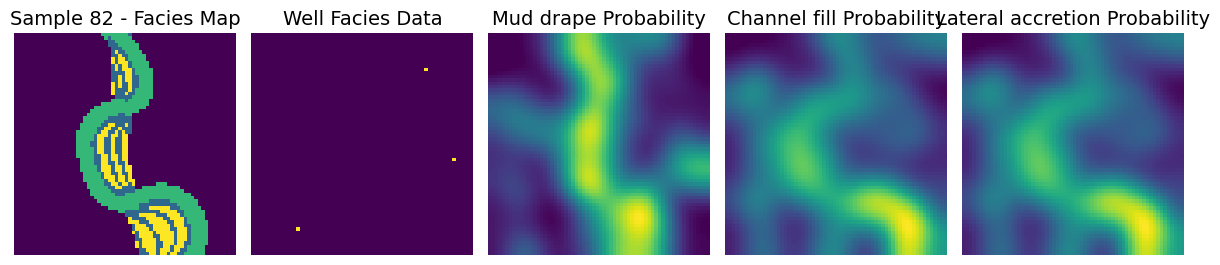

In [ ]:
# Test dataset number
test_num = 82

# --- Plot the test facies map and the corresponding conditioning data ---

fig, axs = plt.subplots(1, 5, figsize=(12, 3))
# Subplot 1: Facies map
axs[0].imshow(facies_test_newcode[test_num, 0].astype(np.float32))
axs[0].set_title(f"Sample {test_num} - Facies Map", fontsize=14)
axs[0].axis('off')

# Subplot 2: Well facies
axs[1].imshow(wellfaciesimgs_test[test_num, 0].astype(np.float32))
axs[1].set_title("Well Facies Data", fontsize=14)
axs[1].axis('off')

# Subplot 3: Mud drape Probability
axs[2].imshow(probimgs_test[test_num, 0].astype(np.float32), cmap='viridis')
axs[2].set_title("Mud drape Probability", fontsize=14)
axs[2].axis('off')

# Subplot 4: Channel fill Probability
axs[3].imshow(probimgs_test[test_num, 1].astype(np.float32), cmap='viridis')
axs[3].set_title("Channel fill Probability", fontsize=14)
axs[3].axis('off')

# Subplot 5: Lateral accretion Probability
axs[4].imshow(probimgs_test[test_num, 1].astype(np.float32), cmap='viridis')
axs[4].set_title("Lateral accretion Probability", fontsize=14)
axs[4].axis('off')

# Global features
print(f"Sample {test_num} Global Features:")
print(f"  Point bar-to-channel fill ratio: {pb_cf_ratio[i]:.3f}")
print(f"  Flood plain proportion: {fp_prop[i]:.2f}")
print("-" * 50)

plt.tight_layout()
plt.show()


#### 3.2 Visualization of Modeling Results Using MPS (SNESIM) of Petrel (Only for test_num = 1)

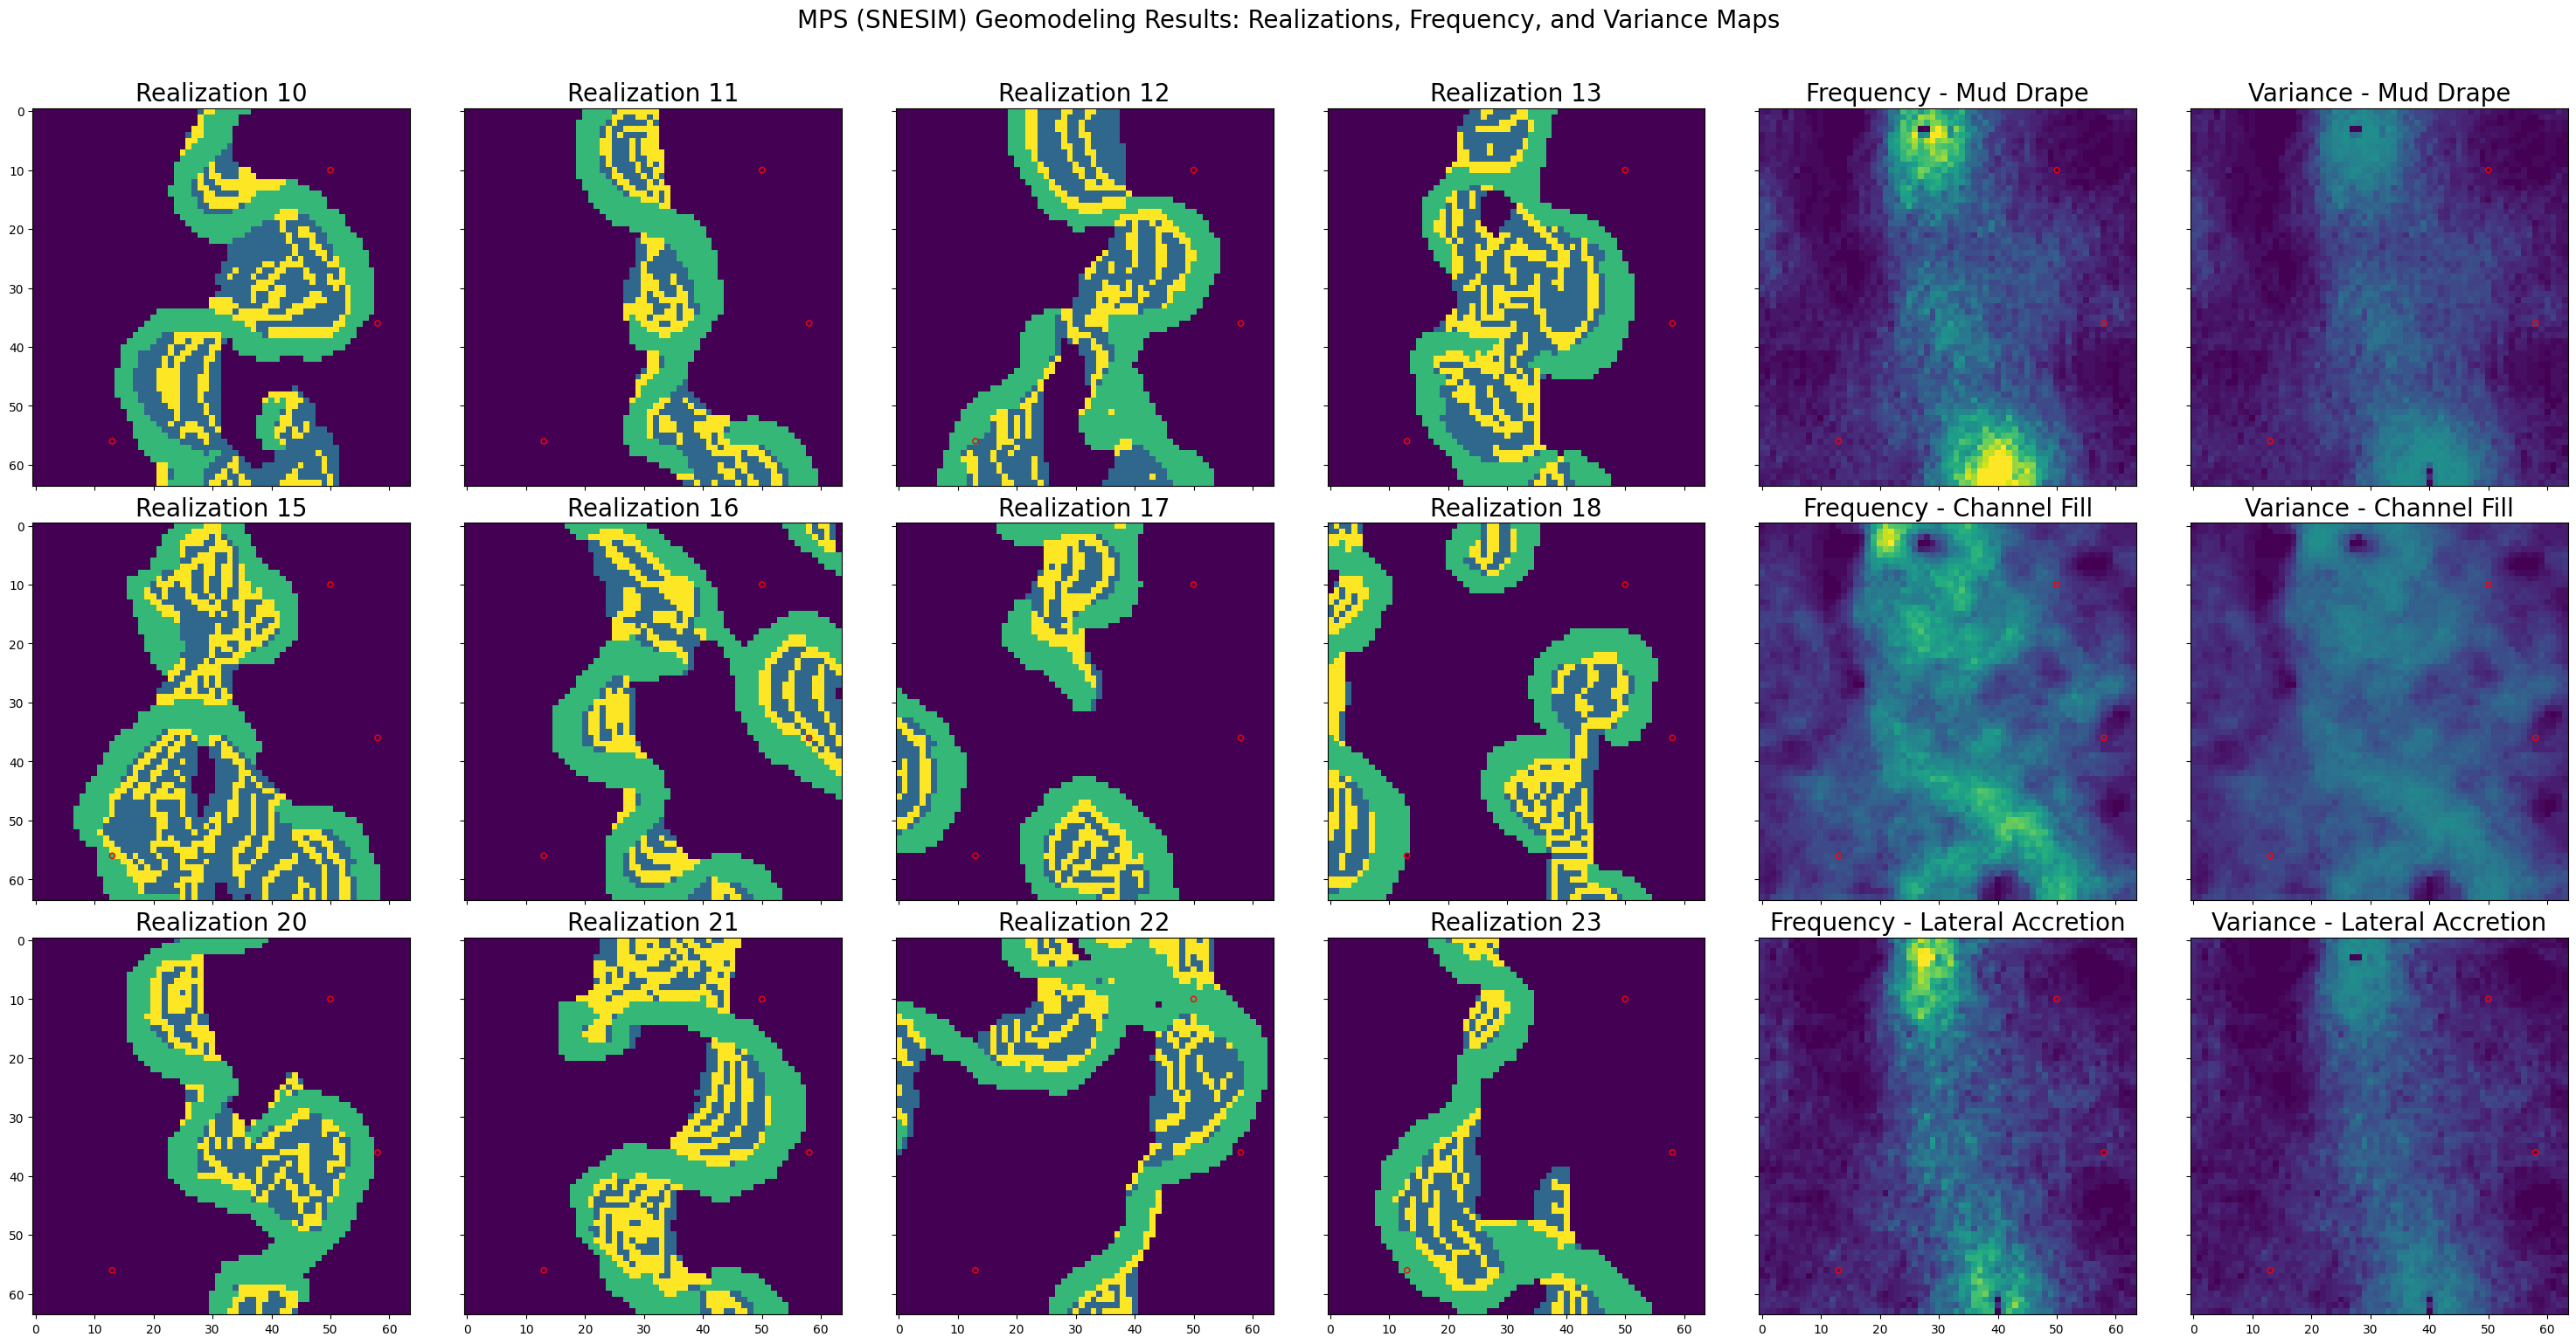

In [ ]:
# --- Load models simulated with Petrel ---
Filepath = '/content/GenAIGeomodeling/Data/GANSim_2DPointbar_Data_Model/SNESIM/pointbar_cond_faciesmodels_case1'
allele=[]
with open(Filepath) as fl:
    for line in fl:
        eles = line.strip().split(' ')
        if len(eles) >= 5:
            allele.append(eles)
partimgs = np.array(allele, dtype=np.float32).reshape(64, 64, -1).astype(np.int32)
partimgs = partimgs[::-1, :, :]
mps_results = partimgs   # MPS results; shape of (64, 64, 100)

# --- Calculate frequency and variance maps for channel levee and channel center ---
snesim_freq_md = np.mean(np.where(mps_results == 1, 1, 0), axis = 2)
snesim_var_md = np.var(np.where(mps_results == 1, 1, 0), axis = 2)
snesim_freq_cf = np.mean(np.where(mps_results == 2, 1, 0), axis = 2)
snesim_var_cf = np.var(np.where(mps_results == 2, 1, 0), axis = 2)
snesim_freq_la = np.mean(np.where(mps_results == 3, 1, 0), axis = 2)
snesim_var_la = np.var(np.where(mps_results == 3, 1, 0), axis = 2)

# --- Plot random realizations, frequency and variance maps for channel levee and channel center ---
fig, ax = plt.subplots(3, 6, sharex='col', sharey='row')
fig.set_size_inches(30, 15, forward=True)

# Titles for individual realizations in first 5 columns
for i in range(3):
    for j in range(4):
        ax[i, j].imshow(mps_results[:, :, i*5+j+10])
        ax[i, j].set_title(f"Realization {i*5 + j + 10}", fontsize=20)

# Titles for frequency and variance maps
# Row 0: Mud Drape
ax[0, 4].imshow(snesim_freq_md, vmin=0, vmax=0.5)
ax[0, 4].set_title("Frequency - Mud Drape", fontsize=20)
ax[0, 5].imshow(snesim_var_md, vmin=0, vmax=0.5)
ax[0, 5].set_title("Variance - Mud Drape", fontsize=20)
# Row 1: Channel Fill
ax[1, 4].imshow(snesim_freq_cf, vmin=0, vmax=0.5)
ax[1, 4].set_title("Frequency - Channel Fill", fontsize=20)
ax[1, 5].imshow(snesim_var_cf, vmin=0, vmax=0.5)
ax[1, 5].set_title("Variance - Channel Fill", fontsize=20)
# Row 2: Lateral Accretion
ax[2, 4].imshow(snesim_freq_la, vmin=0, vmax=0.5)
ax[2, 4].set_title("Frequency - Lateral Accretion", fontsize=20)
ax[2, 5].imshow(snesim_var_la, vmin=0, vmax=0.5)
ax[2, 5].set_title("Variance - Lateral Accretion", fontsize=20)

# Plot well facies points in red circles on all subplots
index_x = np.argwhere(wellfaciesimgs_test_G[test_num, 0] > 0)[:, 1]
index_y = np.argwhere(wellfaciesimgs_test_G[test_num, 0] > 0)[:, 0]
for i in range(3):
    for j in range(6):
        ax[i, j].scatter(index_x, index_y, s=20, marker='o', facecolor='none', edgecolor='red')

# Overall figure title
fig.suptitle("MPS (SNESIM) Geomodeling Results: Realizations, Frequency, and Variance Maps", fontsize=20, y=1.02)

plt.tight_layout()
plt.show()


#### 3.3 Conditional modelling with pretrained generator and evaluation of generated realism and conditioning effects

In [ ]:
print(Gs.input_shapes)
print(Gs.output_shapes)

[[Dimension(None), Dimension(8), Dimension(4), Dimension(4)], [Dimension(None), Dimension(2), Dimension(64), Dimension(64)], [Dimension(None), Dimension(2), Dimension(64), Dimension(64)], [Dimension(None), Dimension(3), Dimension(64), Dimension(64)]]
[[Dimension(None), Dimension(4), Dimension(64), Dimension(64)]]


In [ ]:
# Number of realizations to simulate
real_num = 100

# Preparation of random latents and conditioning global features, well facies, and probability maps
latents_plt = np.random.RandomState(410).randn(real_num, 8, 4, 4)
features_plt = np.tile(features_test[test_num:test_num+1][:, :, np.newaxis, np.newaxis], (real_num, 1, 64, 64))
wellfacies_plt = np.repeat(wellfaciesimgs_test_G[test_num:test_num+1], real_num, axis=0)
prob_plt = np.repeat(probimgs_test[test_num:test_num+1], real_num, axis=0)

# Execute trained generator for conditional geomodelling. The outputs are facies indicators

# Complete the below line of code for geomodelling by taking latent maps and conditions as inputs
# Note: Gs.run(latent maps, feature maps, well facies data, probability maps)
# -----------------??
fakemodel_indicators_plt = Gs.run(latents_plt, features_plt, wellfacies_plt, prob_plt)
# -----------------!!
fakemodels_plt = np.expand_dims(np.argmax(fakemodel_indicators_plt, axis = 1), axis = 1)

# Calculation of frequency and variance maps for different facies types
fakemodel_freq_md = np.average(fakemodel_indicators_plt[:, 1], axis = 0)
fakemodel_var_md = np.var(fakemodel_indicators_plt[:, 1], axis = 0)
fakemodel_freq_cf = np.average(fakemodel_indicators_plt[:, 2], axis = 0)
fakemodel_var_cf = np.var(fakemodel_indicators_plt[:, 2], axis = 0)
fakemodel_freq_la = np.average(fakemodel_indicators_plt[:, 3], axis = 0)
fakemodel_var_la = np.var(fakemodel_indicators_plt[:, 3], axis = 0)

***Evaluate realism and conditioning to input probability maps***

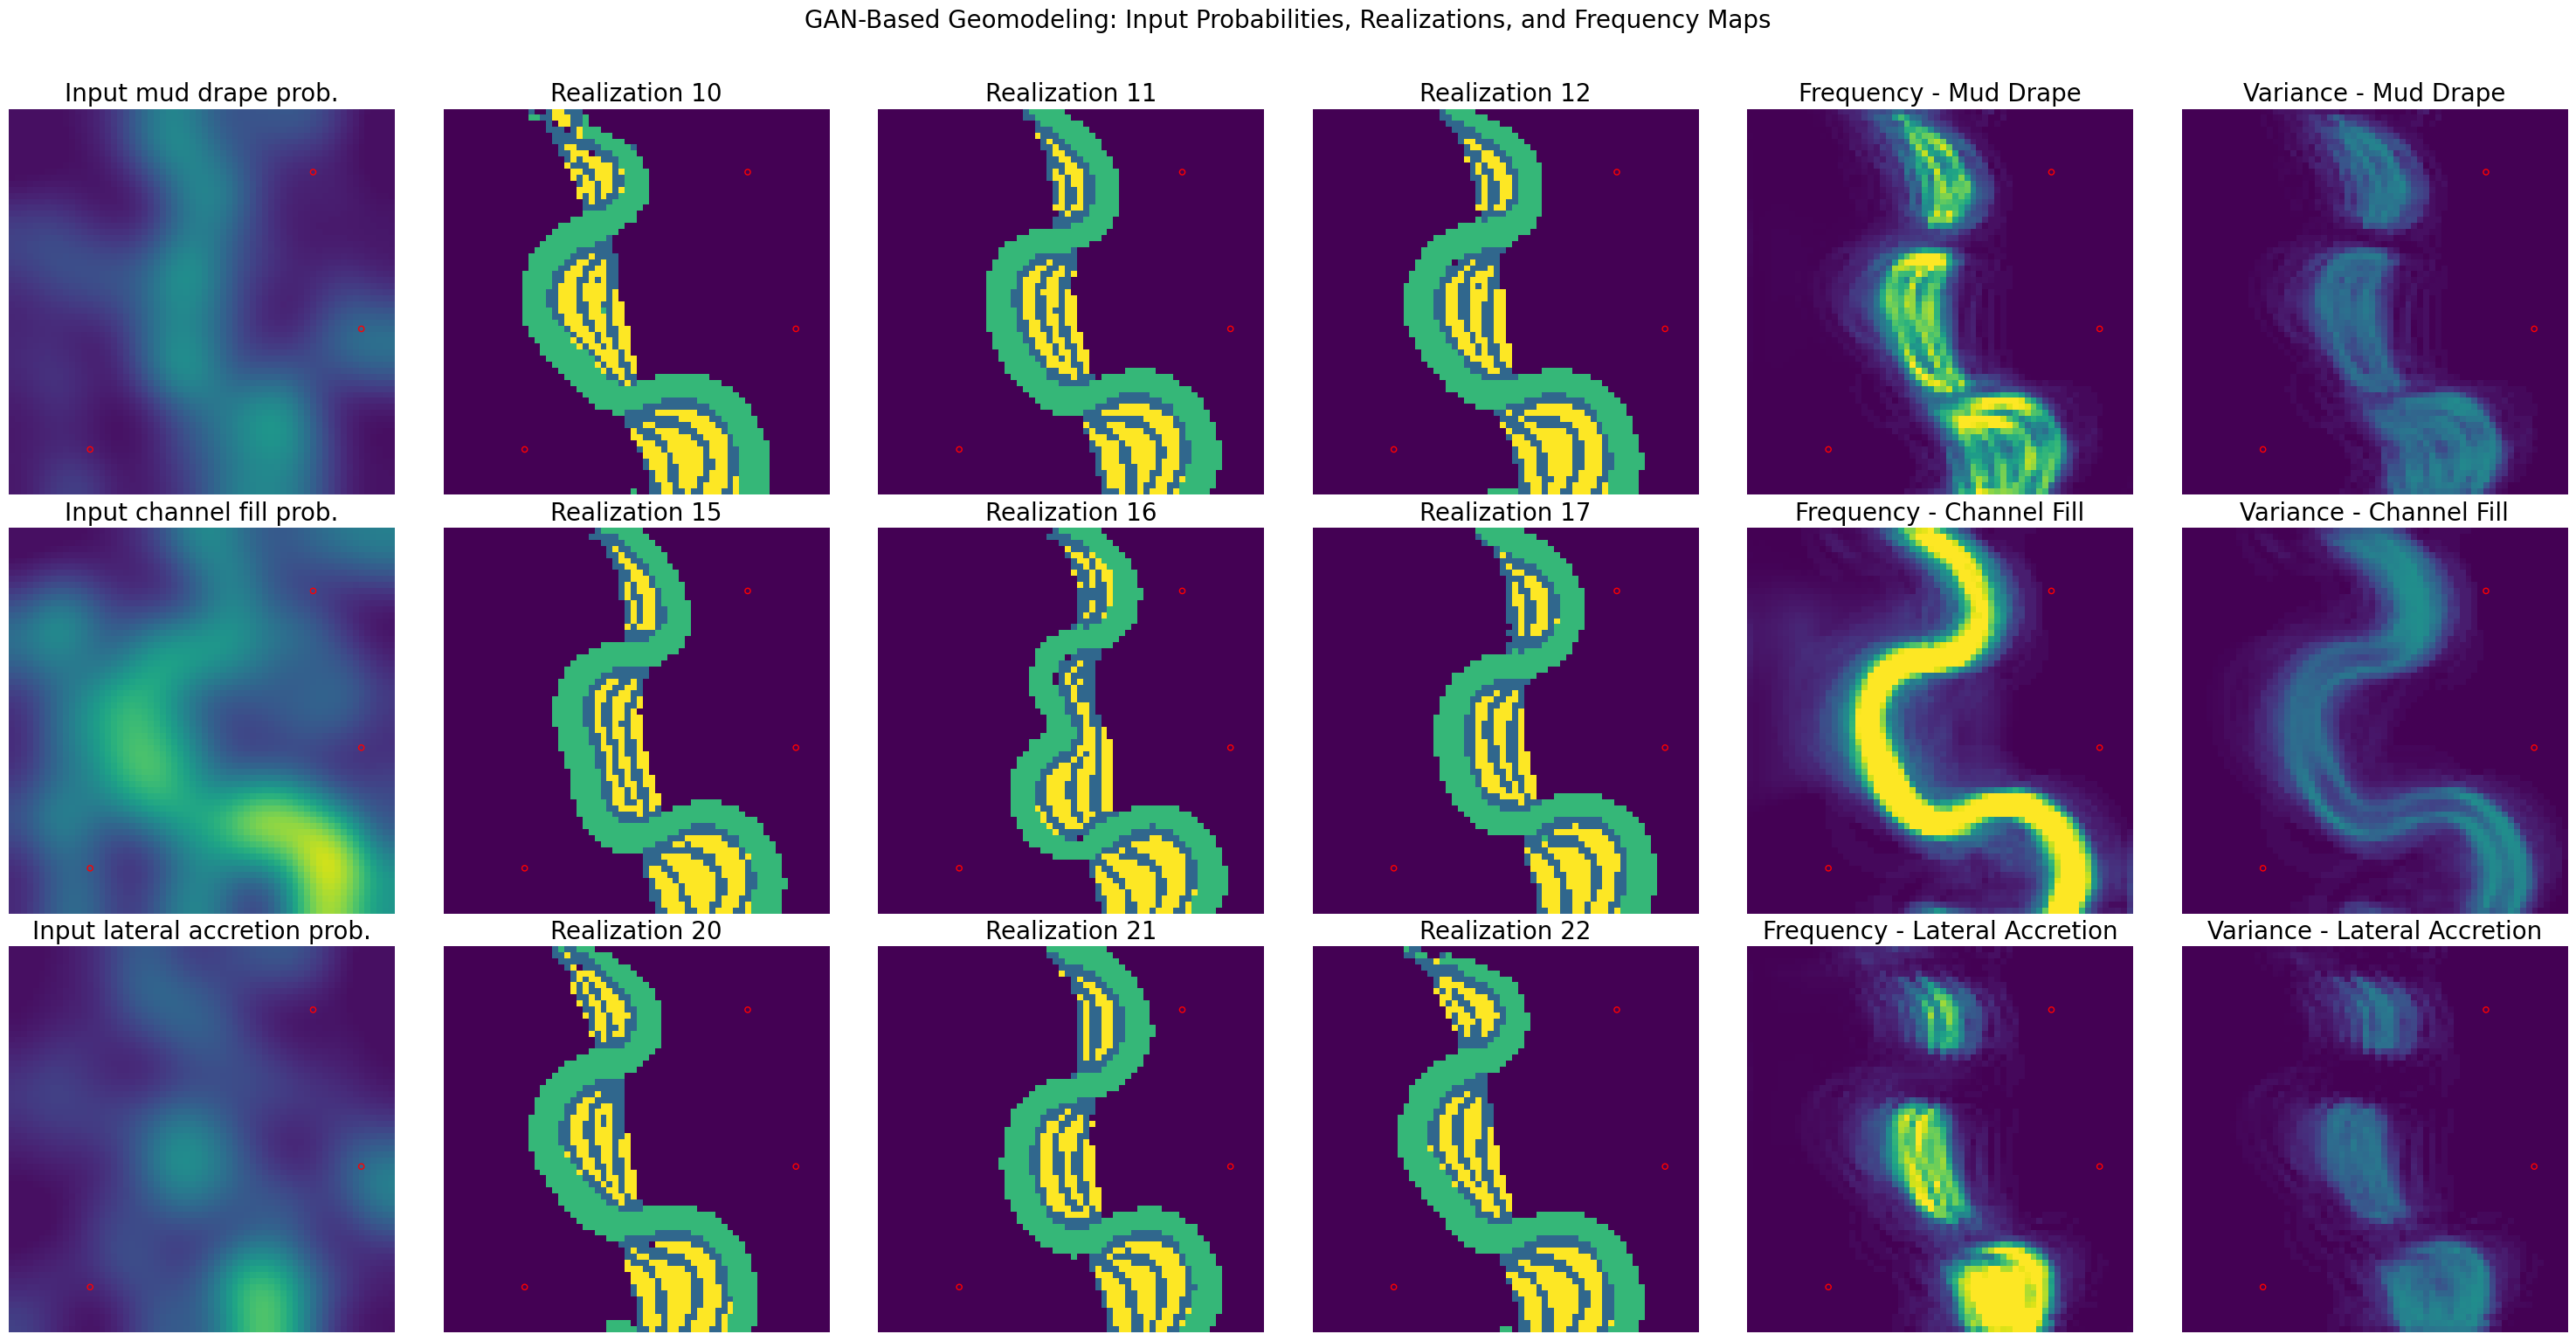

In [ ]:
# --- Plot random realizations, frequency and variance maps for mud drape, channel fill, and lateral accretion ---

fig, ax = plt.subplots(3, 6, sharex='col', sharey='row')
fig.set_size_inches(30, 15, forward=True)

# Plot input probability maps
ax[0, 0].imshow(probimgs_test[test_num, 0].astype(np.float32), cmap='viridis', vmin=0, vmax=0.5)
ax[0, 0].set_title("Input mud drape prob.", fontsize=20)

ax[1, 0].imshow(probimgs_test[test_num, 1].astype(np.float32), cmap='viridis', vmin=0, vmax=0.5)
ax[1, 0].set_title("Input channel fill prob.", fontsize=20)

ax[2, 0].imshow(probimgs_test[test_num, 2].astype(np.float32), cmap='viridis', vmin=0, vmax=0.5)
ax[2, 0].set_title("Input lateral accretion prob.", fontsize=20)

# Plot 10 sample realizations
for i in range(3):
    for j in range(1, 4):
      idx = i * 5 + j - 1 + 10
      ax[i, j].imshow(fakemodels_plt[idx, 0])
      ax[i, j].set_title(f"Realization {idx}", fontsize=20)

# Titles for frequency and variance maps
# Row 0: Mud Drape
ax[0, 4].imshow(fakemodel_freq_md, vmin=0, vmax=0.5)
ax[0, 4].set_title("Frequency - Mud Drape", fontsize=20)
ax[0, 5].imshow(fakemodel_var_md, vmin=0, vmax=0.5)
ax[0, 5].set_title("Variance - Mud Drape", fontsize=20)
# Row 1: Channel Fill
ax[1, 4].imshow(fakemodel_freq_cf, vmin=0, vmax=0.5)
ax[1, 4].set_title("Frequency - Channel Fill", fontsize=20)
ax[1, 5].imshow(fakemodel_var_cf, vmin=0, vmax=0.5)
ax[1, 5].set_title("Variance - Channel Fill", fontsize=20)
# Row 2: Lateral Accretion
ax[2, 4].imshow(fakemodel_freq_la, vmin=0, vmax=0.5)
ax[2, 4].set_title("Frequency - Lateral Accretion", fontsize=20)
ax[2, 5].imshow(fakemodel_var_la, vmin=0, vmax=0.5)
ax[2, 5].set_title("Variance - Lateral Accretion", fontsize=20)

# Plot well facies points in red circles on all subplots
index_x = np.argwhere(wellfaciesimgs_test_G[test_num, 0] > 0)[:, 1]
index_y = np.argwhere(wellfaciesimgs_test_G[test_num, 0] > 0)[:, 0]
for i in range(3):
    for j in range(6):
        ax[i, j].scatter(index_x, index_y, s=20, marker='o', facecolor='none', edgecolor='red')
        ax[i, j].axis('off')

# Overall title
fig.suptitle("GAN-Based Geomodeling: Input Probabilities, Realizations, and Frequency Maps", fontsize=20, y=1.02)

plt.tight_layout()
plt.show()



Well facies reproduction accuracy

In [ ]:
# --- Well facies reproduction accuracy ---

recognized = np.where(wellfacies_plt[:, 1:2]==fakemodels_plt, 1, 0) * wellfacies_plt[:, 0:1]
acc = np.sum(recognized)/np.sum(wellfacies_plt[:, 0:1])

print(acc)

1.0


***Evaluation of conditioning effect to global features***

- Mud proportion of generated maps can be easily computed and compared with the input conditioning one
- Other global features can be visually compared or through an additional recognizer NN

Shape of pb_cf_ratio_gansim: (100,)
Shape of fp_prop_gansim: (100,)


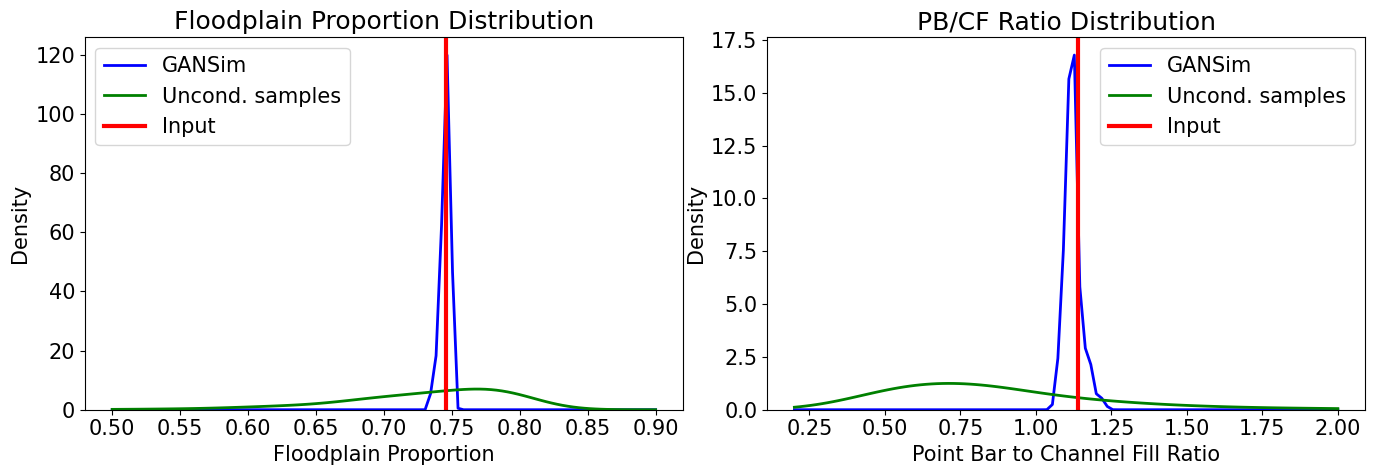

In [ ]:
# --- Comparison of Global Features from Generated Facies Maps (GANSim) and Test Set ---

# Extract indicator maps for different facies
img_indc_fp_gansim = fakemodel_indicators_plt[:, 0:1]  # Floodplain
img_indc_md_gansim = fakemodel_indicators_plt[:, 1:2]  # Mud drape
img_indc_cf_gansim = fakemodel_indicators_plt[:, 2:3]  # Channel fill
img_indc_sd_gansim = fakemodel_indicators_plt[:, 3:4]  # Sand drape

# Compute Point Bar to Channel Fill ratio for GANSim outputs
pb_cf_ratio_gansim = (
    np.mean(img_indc_md_gansim, axis=(1, 2, 3)) +
    np.mean(img_indc_sd_gansim, axis=(1, 2, 3))
) / np.mean(img_indc_cf_gansim, axis=(1, 2, 3))

# Compute Floodplain proportion for GANSim outputs
fp_prop_gansim = np.mean(img_indc_fp_gansim, axis=(1, 2, 3))

print(f"Shape of pb_cf_ratio_gansim: {pb_cf_ratio_gansim.shape}")
print(f"Shape of fp_prop_gansim: {fp_prop_gansim.shape}")

# --- Plotting the PDFs of Floodplain Proportion and PB/CF Ratio ---

from scipy.stats import gaussian_kde
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# --- Left Plot: Floodplain Proportion ---
x_range_fp = np.linspace(0.5, 0.9, 100)
kde_fp_gansim = gaussian_kde(fp_prop_gansim, bw_method=0.4)
kde_fp_true = gaussian_kde(fp_prop, bw_method=0.4)

ax[0].plot(x_range_fp, kde_fp_gansim(x_range_fp), color='blue', linewidth=2, label='GANSim')
ax[0].plot(x_range_fp, kde_fp_true(x_range_fp), color='green', linewidth=2, label='Uncond. samples')
ax[0].axvline(0.746, color='red', linewidth=3, label='Input')
ax[0].set_xlabel('Floodplain Proportion')
ax[0].set_ylabel('Density')
ax[0].set_ylim(bottom=0)
ax[0].set_title('Floodplain Proportion Distribution')
ax[0].legend()

# --- Right Plot: Point Bar to Channel Fill Ratio ---
x_range_pb = np.linspace(0.2, 2.0, 100)
kde_pb_gansim = gaussian_kde(pb_cf_ratio_gansim, bw_method=0.4)
kde_pb_true = gaussian_kde(pb_cf_ratio, bw_method=0.4)

ax[1].plot(x_range_pb, kde_pb_gansim(x_range_pb), color='blue', linewidth=2, label='GANSim')
ax[1].plot(x_range_pb, kde_pb_true(x_range_pb), color='green', linewidth=2, label='Uncond. samples')
ax[1].axvline(1.14, color='red', linewidth=3, label='Input')
ax[1].set_xlabel('Point Bar to Channel Fill Ratio')
ax[1].set_ylabel('Density')
ax[1].set_ylim(bottom=0)
ax[1].set_title('PB/CF Ratio Distribution')
ax[1].legend()

plt.subplots_adjust(wspace=0.25)
plt.tight_layout()
plt.show()


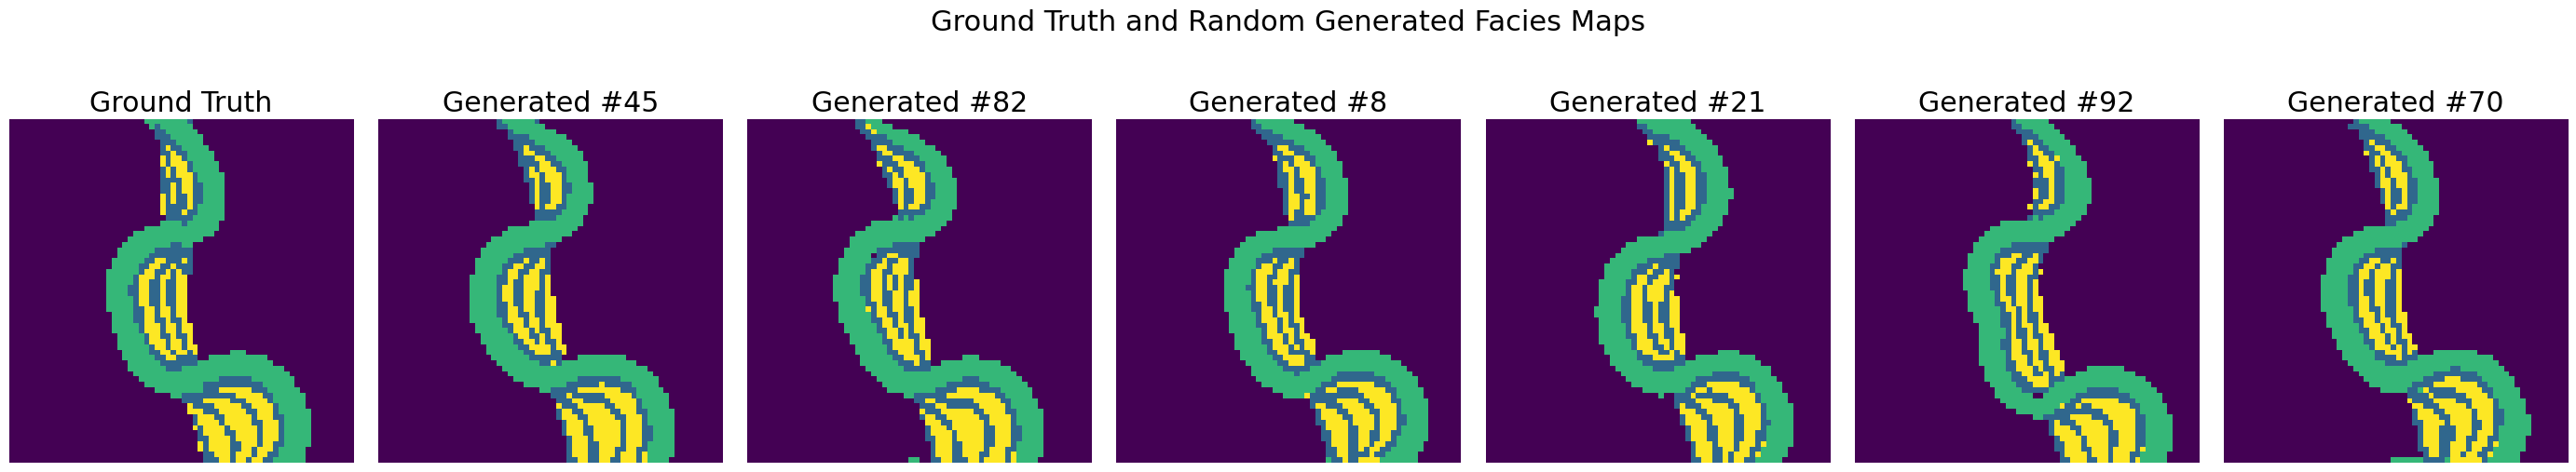

In [ ]:
# --- Visually compare test sample and 6 random generated realizations ---

test_index = test_num  # Assuming test_num is defined
random_indices = np.random.choice(fakemodels_plt.shape[0], 6, replace=False)

# Plot
plt.rcParams.update({'font.size': 18})
fig, axs = plt.subplots(1, 7, figsize=(28, 5))

# Ground truth facies map
axs[0].imshow(facies_test_newcode[test_index, 0])
axs[0].set_title("Ground Truth")
axs[0].axis('off')

# 6 generated realizations
for i, idx in enumerate(random_indices):
    axs[i + 1].imshow(fakemodels_plt[idx, 0])
    axs[i + 1].set_title(f"Generated #{idx}")
    axs[i + 1].axis('off')

fig.suptitle("Ground Truth and Random Generated Facies Maps", fontsize=22, y=1.05)
plt.tight_layout()
plt.show()

*Similar global features including point bar to channel fill and flood plain proportion*

#### 3.4 Gradually changing conditioning global features

##### ***Gradually changing inputPoint Bar to Channel Fill Ratio value***

In [ ]:
# --- Varying Point Bar to Channel Fill Ratio to Generate Realizations ---

# Number of realizations to generate
real_num = 6

# Original test point bar to channel fill ratio (raw, before normalization)
pb_cf_ratio_raw = (features_test[test_num, 0] / 2 + 0.5) * (2 - 0.2) + 0.2
# Generate 6 pb_cf_ratio values from -30% to +20% of the original test pb_cf_ratio
pb_cf_ratio_varied_raw = np.linspace(0.5 * pb_cf_ratio_raw, 1.5 * pb_cf_ratio_raw, real_num)
# Normalize pb_cf_ratio values into the range of [-1, 1]
pb_cf_ratio_varied_norm = ((pb_cf_ratio_varied_raw - 0.2) / (2 - 0.2) - 0.5) * 2
# Get the test features (normalized); shape of [6, 2]
features_plt_vectors = np.tile(features_test[test_num:test_num+1], (real_num, 1))

# Replace with the normalized gradually changing pb_cf_ratio values
features_plt_vectors[:, 0] = pb_cf_ratio_varied_norm

# Expand to shape [real_num, 2, 64, 64]
features_plt = features_plt_vectors[:, :, np.newaxis, np.newaxis]
features_plt = np.tile(features_plt, (1, 1, 64, 64))

# Fixed latent cube (same for all realizations)
np.random.seed(81)
latent_single = np.random.randn(8, 4, 4)
latents_plt = np.tile(latent_single[np.newaxis, ...], (real_num, 1, 1, 1))  # shape: (6, 8, 4, 4)

# Repeat well facies and probability maps 6 times
wellfacies_plt = np.repeat(wellfaciesimgs_test_G[test_num:test_num+1], real_num, axis=0)
prob_plt = np.repeat(probimgs_test[test_num:test_num+1], real_num, axis=0)

# Run generator
fakemodel_indicators_plt = Gs.run(latents_plt, features_plt, wellfacies_plt, prob_plt)
fakemodels_plt = np.expand_dims(np.argmax(fakemodel_indicators_plt, axis=1), axis=1)

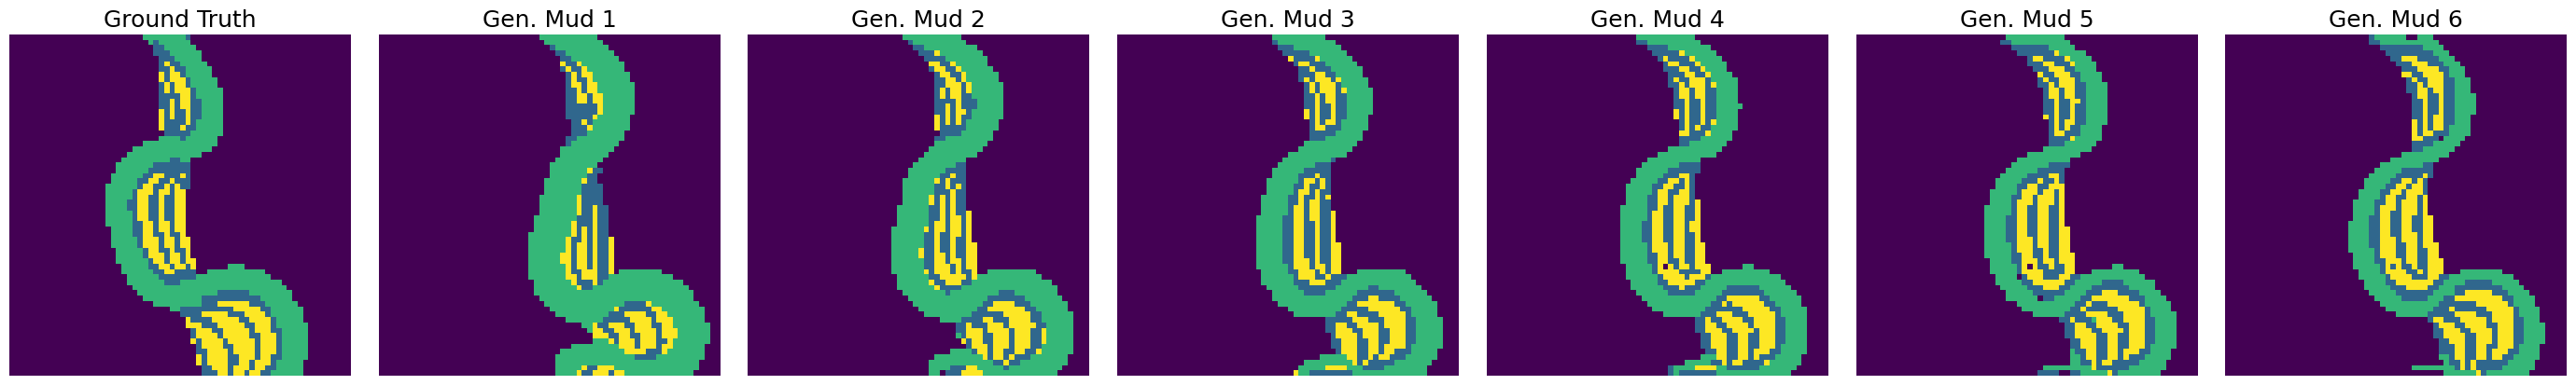

In [ ]:
plt.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(1, 7, figsize=(28, 5))

# Plot ground truth facies map
axs[0].imshow(facies_test_newcode[test_num, 0])
axs[0].set_title("Ground Truth", fontsize=18)
axs[0].axis('off')

# Plot 6 generated facies maps
for i in range(6):
    axs[i + 1].imshow(fakemodels_plt[i, 0])
    axs[i + 1].set_title(f"Gen. Mud {i+1}", fontsize=18)
    axs[i + 1].axis('off')

plt.tight_layout()
plt.show()

##### ***Gradually changing input flood plain proportion value***

In [ ]:
# --- Varying Flood Plain Proportion to Generate Realizations ---

# Number of realizations to generate
real_num = 6

# Original test flood plain proportion (raw, before normalization)
fp_prop_raw = (features_test[test_num, 1] / 2 + 0.5) * (0.82 - 0.5) + 0.5

# Generate 6 fp_prop values from -30% to +20% of the original test fp_prop
fp_prop_varied_raw = np.linspace(0.85 * fp_prop_raw, 1.2 * fp_prop_raw, real_num)

# Normalize fp_prop values into the range of [-1, 1]
fp_prop_varied_norm = ((fp_prop_varied_raw - 0.5) / (0.82 - 0.5) - 0.5) * 2

# Get the test features (normalized); shape of [6, 2]
features_plt_vectors = np.tile(features_test[test_num:test_num+1], (real_num, 1))

# Replace with the normalized gradually changing fp_prop values
features_plt_vectors[:, 1] = fp_prop_varied_norm

# Expand to shape [real_num, 2, 64, 64]
features_plt = features_plt_vectors[:, :, np.newaxis, np.newaxis]
features_plt = np.tile(features_plt, (1, 1, 64, 64))

# Fixed latent cube (same for all realizations)
np.random.seed(81)
latent_single = np.random.randn(8, 4, 4)
latents_plt = np.tile(latent_single[np.newaxis, ...], (real_num, 1, 1, 1))  # shape: (6, 8, 4, 4)

# Repeat well facies and probability maps 6 times
wellfacies_plt = np.repeat(wellfaciesimgs_test_G[test_num:test_num+1], real_num, axis=0)
prob_plt = np.repeat(probimgs_test[test_num:test_num+1], real_num, axis=0)

# Run generator
fakemodel_indicators_plt = Gs.run(latents_plt, features_plt, wellfacies_plt, prob_plt)
fakemodels_plt = np.expand_dims(np.argmax(fakemodel_indicators_plt, axis=1), axis=1)


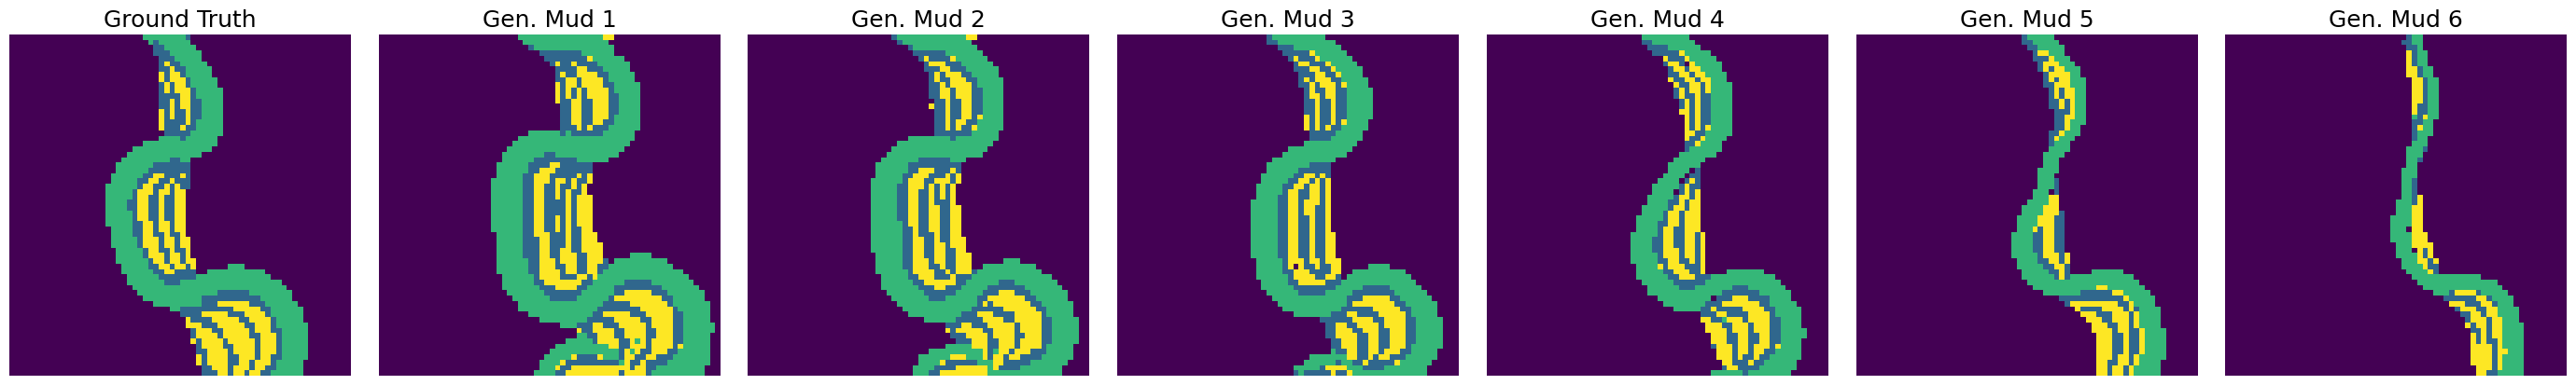

In [ ]:
plt.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(1, 7, figsize=(28, 5))

# Plot ground truth facies map
axs[0].imshow(facies_test_newcode[test_num, 0])
axs[0].set_title("Ground Truth", fontsize=18)
axs[0].axis('off')

# Plot 6 generated facies maps
for i in range(6):
    axs[i + 1].imshow(fakemodels_plt[i, 0])
    axs[i + 1].set_title(f"Gen. Mud {i+1}", fontsize=18)
    axs[i + 1].axis('off')

plt.tight_layout()
plt.show()

-------
### **?? Hands-on excercise:**

**1. Randomly choose another "test_num" in the first cell of part 3.1, and excecute the above geomodelling process**


**2. Choose other seed values for `np.random.RandomState(seed)` in above cells to randomize the input latent maps, so that more realizations could be produced.**



--------

### **4. Application of the trained generator for geomodelling of large reservoirs**

#### **4.1 Construct a new generator producing larger-size geomodels**

In [ ]:
# ---Build a new larger generator with the output of 192x192 ------

import config
import tfutil

resolution_x = 192
resolution_y = 192
latent_size_x = int(resolution_x/16)  # 16
latent_size_y = int(resolution_y/16)  # 23

Gs_enlarged = tfutil.Network('Gs_enlarged1',
                             resolution_x = resolution_x, resolution_y = resolution_y,
                             latent_size_x = latent_size_x, latent_size_y = latent_size_y,
                             **config.G)

print(Gs_enlarged.input_shapes)

# ---Copy trained parameters from the trained small generator ------
Gs_enlarged.copy_trainables_from(Gs)

[[Dimension(None), Dimension(8), Dimension(12), Dimension(12)], [Dimension(None), Dimension(2), Dimension(192), Dimension(192)], [Dimension(None), Dimension(2), Dimension(192), Dimension(192)], [Dimension(None), Dimension(3), Dimension(192), Dimension(192)]]


#### **4.2 Load a large test facies image and construct conditioning data from it**

(1, 1, 192, 192)


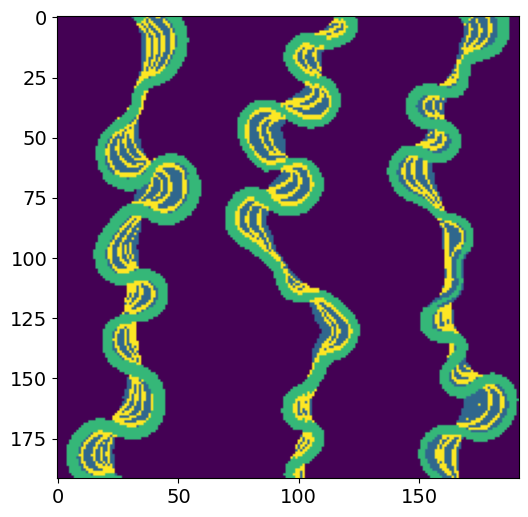

In [ ]:
# ---Load one large test facies images with a size of 200x200 -----
TIs_large_load = np.load('/content/GenAIGeomodeling/Data/GANSim_2DPointbar_Data_Model/TI_large/Unc_point_TI.npy')
TIs_large_load = TIs_large_load.reshape(-1, 1, 200, 200)
geomodel_large_truth = TIs_large_load[:, :, :resolution_x, :resolution_y]
print(geomodel_large_truth.shape)

plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row')
fig.set_size_inches(6, 6, forward=True)
ax.imshow(geomodel_large_truth[0,0])

(1, 2, 192, 192)


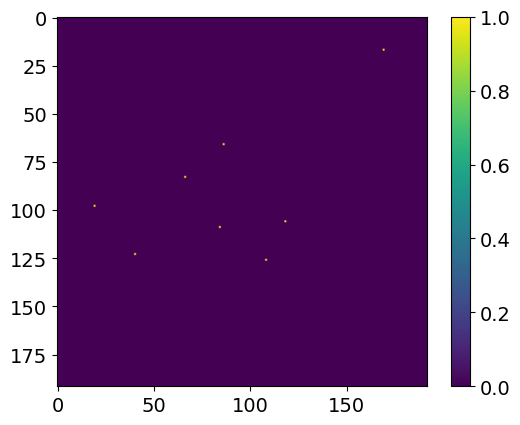

In [ ]:
# --- Generate random well facies data ----
geomodel_large_truth_wellpoints = np.zeros(geomodel_large_truth.shape, dtype = np.int8)
for i in range(1):
    well_points_num = 8 #np.random.RandomState(3*i + i*i).choice(np.arange(1, 25), 1)  # Random choose the expected total number of well points
    xs = np.random.RandomState(123*i+123).choice(geomodel_large_truth.shape[2], well_points_num)
    ys = np.random.RandomState(3*i + i*i+111).choice(geomodel_large_truth.shape[3], well_points_num)
    geomodel_large_truth_wellpoints[i, 0, xs, ys] = 1

geomodel_large_truth_wellfacies = geomodel_large_truth * geomodel_large_truth_wellpoints
geomodel_large_truth_wellfacies = np.concatenate((geomodel_large_truth_wellpoints, geomodel_large_truth_wellfacies), axis = 1)
geomodel_large_truth_wellfacies = geomodel_large_truth_wellfacies[:, :, :resolution_x, :resolution_y]

print(geomodel_large_truth_wellfacies.shape)

plt.imshow(geomodel_large_truth_wellfacies[0, 0])
plt.colorbar()

In [ ]:
# --- Generate probability maps for the large test facies maps (3 facies: mud drape, channel fill, lateral accretion) ---

def noise(img, max_noise_size):
    img_x = img.shape[0]
    img_y = img.shape[1]
    img_noise = np.zeros(img.shape)

    # (1) add noise within the facies of indicator = 1
    noise_num_max = np.round(np.sum(img) / 40)
    if noise_num_max > 0:
        ind_indices = np.argwhere(img >= 0.9)
        noise_num = np.random.RandomState(123).randint(0, noise_num_max)
        noise_indices = np.random.RandomState(123).randint(0, ind_indices.shape[0], noise_num)
        noise_coos = ind_indices[noise_indices]
        noise_sizes = np.random.RandomState(123).randint(3, max_noise_size, noise_num)
        noise_values = np.random.RandomState(123).uniform(-2., 1.5, noise_num)
        for i in range(noise_num):
            x, y = noise_coos[i]
            s = noise_sizes[i]
            v = noise_values[i]
            img_noise[x:min(img_x, x + s), y:min(img_y, y + s)] = v

    # (2) add noise within the facies of indicator = 0
    noise_num_max = np.round((img_x * img_y - np.sum(img)) / 40)
    if noise_num_max > 0:
        ind_indices = np.argwhere(img <= 0.1)
        noise_num = np.random.RandomState(123).randint(0, noise_num_max)
        noise_indices = np.random.RandomState(123).randint(0, ind_indices.shape[0], noise_num)
        noise_coos = ind_indices[noise_indices]
        noise_sizes = np.random.RandomState(123).randint(3, max_noise_size, noise_num)
        noise_values = np.random.RandomState(123).uniform(0., 1., noise_num)
        for i in range(noise_num):
            x, y = noise_coos[i]
            s = noise_sizes[i]
            v = noise_values[i]
            img_noise[x:min(img_x, x + s), y:min(img_y, y + s)] = v

    return img_noise


from scipy import ndimage

# Preallocate probability array: 3 facies
geomodel_large_truth_prob = np.zeros((geomodel_large_truth.shape[0], 3, geomodel_large_truth.shape[2], geomodel_large_truth.shape[3]), dtype=np.float16)

for num in range(geomodel_large_truth.shape[0]):
    if num % 100 == 0:
        print(num)

    k = 5  # Gaussian kernel sigma

    # Create binary indicators for each facies
    img_indc_md = (geomodel_large_truth[num, 0] == 1).astype(np.float32)  # Mud drape
    img_indc_cf = (geomodel_large_truth[num, 0] == 2).astype(np.float32)  # Channel fill
    img_indc_la = (geomodel_large_truth[num, 0] == 3).astype(np.float32)  # Lateral accretion

    # Add noise and smooth for each facies
    noise_md = noise(img_indc_md, 6)
    noise_cf = noise(img_indc_cf, 6)
    noise_la = noise(img_indc_la, 6)

    prob_md = ndimage.gaussian_filter(img_indc_md, sigma=(k, k), mode='reflect') + ndimage.gaussian_filter(noise_md, sigma=(k, k), mode='reflect')
    prob_cf = ndimage.gaussian_filter(img_indc_cf, sigma=(k, k), mode='reflect') + ndimage.gaussian_filter(noise_cf, sigma=(k, k), mode='reflect')
    prob_la = ndimage.gaussian_filter(img_indc_la, sigma=(k, k), mode='reflect') + ndimage.gaussian_filter(noise_la, sigma=(k, k), mode='reflect')

    # Normalize and adjust dynamic range
    prob_sum = prob_md + prob_cf + prob_la
    prob_sum_max = np.amax(prob_sum)

    if prob_sum_max < 0.25:
        prob_mx = np.random.RandomState(123).rand(1) * 0.45 + 0.25
        prob_md *= prob_mx / prob_sum_max
        prob_cf *= prob_mx / prob_sum_max
        prob_la *= prob_mx / prob_sum_max

    if prob_sum_max > 0.9:
        prob_md = prob_md / prob_sum_max * 0.9
        prob_cf = prob_cf / prob_sum_max * 0.9
        prob_la = prob_la / prob_sum_max * 0.9

    # Clip low probabilities to a floor value
    geomodel_large_truth_prob[num, 0] = np.clip(prob_md, 0.02, 1.0)
    geomodel_large_truth_prob[num, 1] = np.clip(prob_cf, 0.02, 1.0)
    geomodel_large_truth_prob[num, 2] = np.clip(prob_la, 0.02, 1.0)

# Crop if needed
geomodel_large_truth_prob = geomodel_large_truth_prob[:, :, :resolution_x, :resolution_y]
print(geomodel_large_truth_prob.shape)


0
(1, 3, 192, 192)


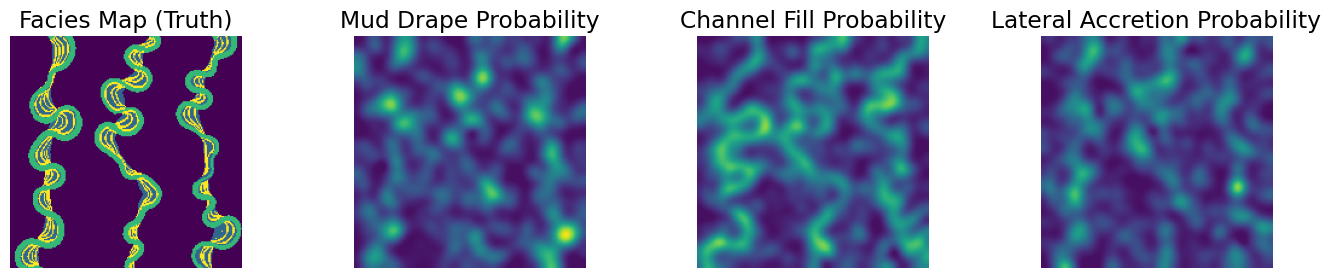

In [ ]:
# Well facies data and probability maps (3 facies: mud drape, channel fill, lateral accretion)
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(1, 4)
fig.set_size_inches(14, 3, forward=True)

# Raw facies map (ground truth)
ax[0].imshow(geomodel_large_truth[0, 0].astype(np.float32))
ax[0].set_title('Facies Map (Truth)')
ax[0].axis('off')

# Mud drape probability
ax[1].imshow(geomodel_large_truth_prob[0, 0].astype(np.float32), vmin=0, vmax=0.5)
ax[1].set_title('Mud Drape Probability')
ax[1].axis('off')

# Channel fill probability
ax[2].imshow(geomodel_large_truth_prob[0, 1].astype(np.float32), vmin=0, vmax=0.5)
ax[2].set_title('Channel Fill Probability')
ax[2].axis('off')

# Lateral accretion probability
ax[3].imshow(geomodel_large_truth_prob[0, 2].astype(np.float32), vmin=0, vmax=0.5)
ax[3].set_title('Lateral Accretion Probability')
ax[3].axis('off')

plt.tight_layout()
plt.show()



In [ ]:
## Global feature lables

TI_fp_prop = np.mean(np.where(geomodel_large_truth==0, 1, 0))
TI_pb_to_cf_ratio = np.mean(np.where(((geomodel_large_truth==1) | (geomodel_large_truth==3)), 1, 0)) / np.mean(np.where(geomodel_large_truth==2, 1, 0))

print(TI_fp_prop)
print(TI_pb_to_cf_ratio)

TI_pb_to_cf_ratio_norm = ((TI_pb_to_cf_ratio - 0.2) / (2 - 0.2) - 0.5) * 2
TI_fp_prop_norm = ((TI_fp_prop - 0.5) / (0.82 - 0.5) - 0.5) * 2
TI_feature_norm = np.array([TI_pb_to_cf_ratio_norm, TI_fp_prop_norm])[np.newaxis, :, np.newaxis, np.newaxis]
print(TI_feature_norm.shape)

0.7256130642361112
1.164099272571673
(1, 2, 1, 1)


#### **4.3 Conditional geomodelling with the new larger generator given conditioning data**

In [ ]:
# --- Generate large facies models with the new large generator ----
real_num = 100
latents_plt = np.random.RandomState(160).randn(
    real_num,
    Gs_enlarged.input_shapes[0][1],
    Gs_enlarged.input_shapes[0][2],
    Gs_enlarged.input_shapes[0][3]
)

# Use the features of the previous test dataset (64x64)
features_plt = np.tile(TI_feature_norm, (real_num, 1, resolution_x, resolution_y))

# Repeat well facies and probability maps
wellfacies_plt = np.repeat(geomodel_large_truth_wellfacies, real_num, axis=0)
prob_plt = np.repeat(geomodel_large_truth_prob, real_num, axis=0)

# Run generator
fakemodel_indicators_plt = Gs_enlarged.run(latents_plt, features_plt, wellfacies_plt, prob_plt)
fakemodels_plt_lg = np.expand_dims(np.argmax(fakemodel_indicators_plt, axis=1), axis=1)

# --- Compute frequency and variance maps for each facies -----
fakemodel_freq_md = np.mean(fakemodel_indicators_plt[:, 1], axis=0)
fakemodel_var_md  = np.var(fakemodel_indicators_plt[:, 1], axis=0)

fakemodel_freq_cf  = np.mean(fakemodel_indicators_plt[:, 2], axis=0)
fakemodel_var_cf   = np.var(fakemodel_indicators_plt[:, 2], axis=0)

fakemodel_freq_la = np.mean(fakemodel_indicators_plt[:, 3], axis=0)
fakemodel_var_lla  = np.var(fakemodel_indicators_plt[:, 3], axis=0)


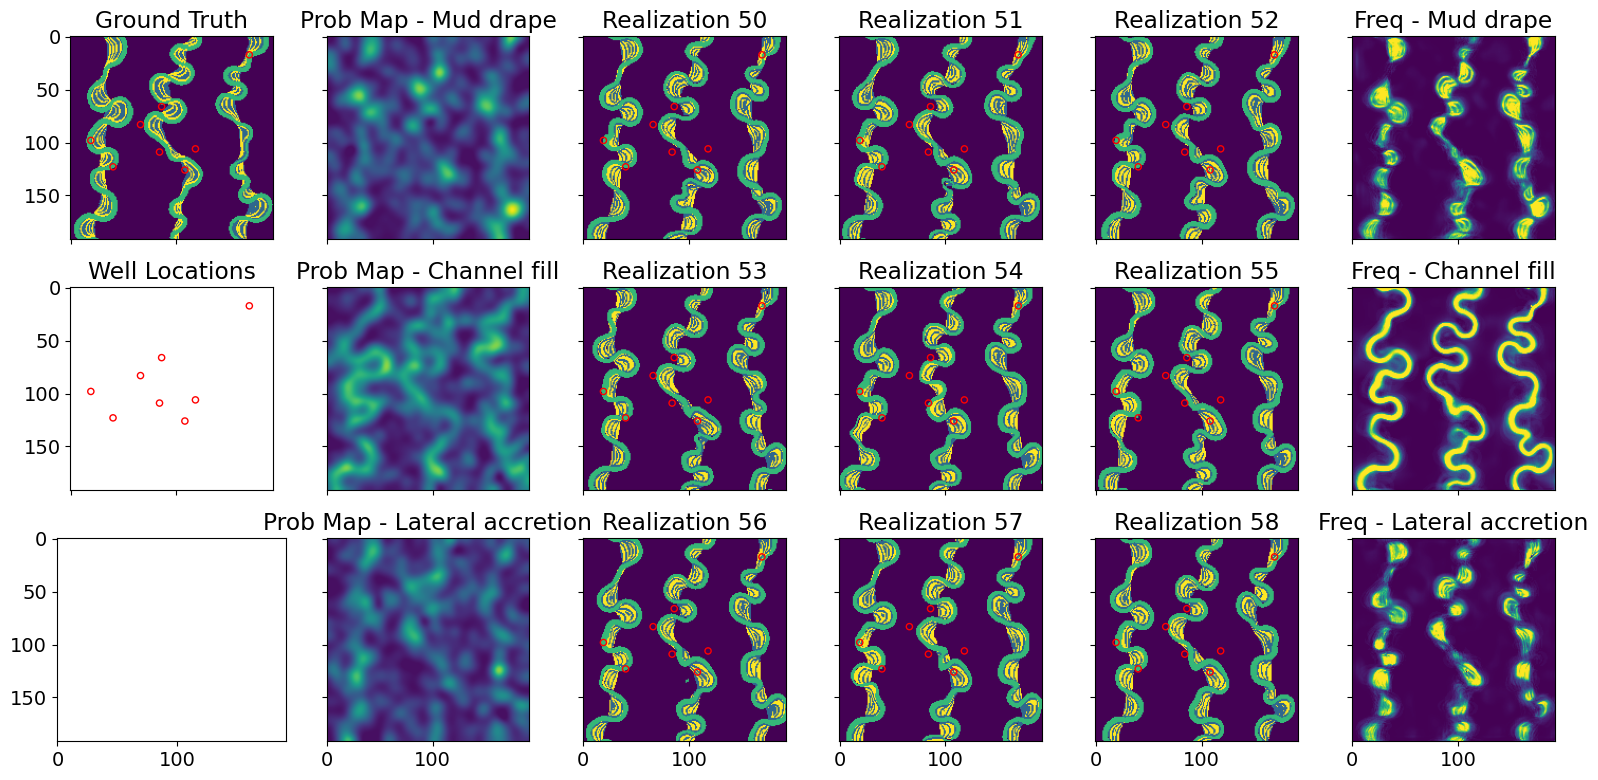

In [ ]:
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(3, 6, sharex='col', sharey='row')  # 6 columns
fig.set_size_inches(16, 8, forward=True)

# Top-left: ground truth facies map
ax[0, 0].imshow(geomodel_large_truth[0, 0])
ax[0, 0].set_title("Ground Truth")

# Bottom-left: well facies location map (white background)
ax[1, 0].imshow(np.ones_like(geomodel_large_truth[0, 0]), cmap='gray', vmin=0, vmax=1)
ax[1, 0].set_title("Well Locations")

# Overlay well locations on both
index_x = np.argwhere(geomodel_large_truth_wellfacies[0, 0] > 0)[:, 1]
index_y = np.argwhere(geomodel_large_truth_wellfacies[0, 0] > 0)[:, 0]
for a in [ax[0, 0], ax[1, 0]]:
    a.scatter(index_x, index_y, s=20, marker='o', facecolor='none', edgecolor='red')

# Column 2: probability maps (mud drape, channel fill, lateral accretion)
ax[0, 1].imshow(geomodel_large_truth_prob[0, 0], vmin=0, vmax=0.5)
ax[0, 1].set_title("Prob Map - Mud drape")
ax[1, 1].imshow(geomodel_large_truth_prob[0, 1], vmin=0, vmax=0.5)
ax[1, 1].set_title("Prob Map - Channel fill")
ax[2, 1].imshow(geomodel_large_truth_prob[0, 2], vmin=0, vmax=0.5)
ax[2, 1].set_title("Prob Map - Lateral accretion")

# Columns 3–5: 6 realizations
for i in range(3):
    for j in range(2, 5):
        idx = (i * 3) + (j - 2) + 50  # realization index: 10–15
        ax[i, j].imshow(fakemodels_plt_lg[idx, 0])
        ax[i, j].set_title(f"Realization {idx}")
        ax[i, j].scatter(index_x, index_y, s=20, marker='o', facecolor='none', edgecolor='red')

# Column 6: frequency maps (channel and levee)
ax[0, 5].imshow(fakemodel_freq_md, vmin=0, vmax=0.5)
ax[0, 5].set_title("Freq - Mud drape")
ax[1, 5].imshow(fakemodel_freq_cf, vmin=0, vmax=0.5)
ax[1, 5].set_title("Freq - Channel fill")
ax[2, 5].imshow(fakemodel_freq_la, vmin=0, vmax=0.5)
ax[2, 5].set_title("Freq - Lateral accretion")

plt.tight_layout()
plt.show()
